# How to Plot Learning Curve and Confusion Matrix in TensorFlow 2.0

!pip install tensorflow==2.0.0-rc0

!pip install tensorflow-gpu==2.0.0-rc0

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

print(tf.__version__)

2.0.0-rc0


## Import the Fashion MNIST dataset

In [2]:
mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [5]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [6]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Train the model

In [7]:
history = model.fit(X_train, y_train, epochs= 10, batch_size= 100, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.5672 - accuracy: 0.8053 - val_loss: 0.5047 - val_accuracy: 0.8158
Epoch 2/10
48000/48000 [==============================] - 1s 29us/sample - loss: 0.4163 - accuracy: 0.8544 - val_loss: 0.4043 - val_accuracy: 0.8564
Epoch 3/10
48000/48000 [==============================] - 1s 30us/sample - loss: 0.3767 - accuracy: 0.8657 - val_loss: 0.3871 - val_accuracy: 0.8627
Epoch 4/10
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3504 - accuracy: 0.8752 - val_loss: 0.3754 - val_accuracy: 0.8641
Epoch 5/10
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3269 - accuracy: 0.8823 - val_loss: 0.3520 - val_accuracy: 0.8762
Epoch 6/10
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3108 - accuracy: 0.8874 - val_loss: 0.3587 - val_accuracy: 0.8745
Epoch 7/10
48000/48000 [==============================] 

In [8]:
from sklearn.metrics import accuracy_score

In [10]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

0.8676

## Plotting Learning Curve and Confusion Matrix in TensorFlow 2.0

##### Detailed video is available here: https://youtu.be/SToqP9V9y7Q 

pip install mlxtend  ->  http://rasbt.github.io/mlxtend/installation/

In [12]:
history.history

{'loss': [0.5671657631794612,
  0.416268079324315,
  0.3767108126853903,
  0.3503672878878812,
  0.3269082202886542,
  0.31082628446941574,
  0.3009124948177487,
  0.2826295469887555,
  0.27493296813530227,
  0.26440160650139055],
 'accuracy': [0.80527085,
  0.85441667,
  0.8656875,
  0.8751875,
  0.88233334,
  0.887375,
  0.890875,
  0.896875,
  0.89870834,
  0.9030833],
 'val_loss': [0.5046907005210718,
  0.404282962406675,
  0.3871324103325605,
  0.37539500221610067,
  0.3519606783986092,
  0.3586555427561204,
  0.331784138455987,
  0.34921714502076306,
  0.32572391579548515,
  0.3395168824742238],
 'val_accuracy': [0.81583333,
  0.85641664,
  0.86275,
  0.86408335,
  0.87616664,
  0.8745,
  0.8814167,
  0.87375,
  0.8818333,
  0.876]}

In [13]:
import matplotlib.pyplot as plt

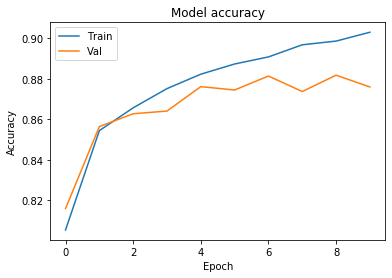

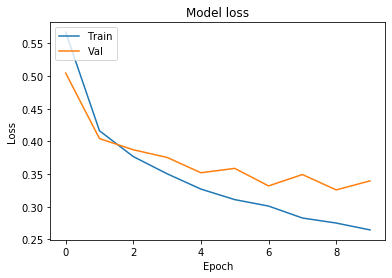

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [15]:
!pip install mlxtend

In [16]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [18]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

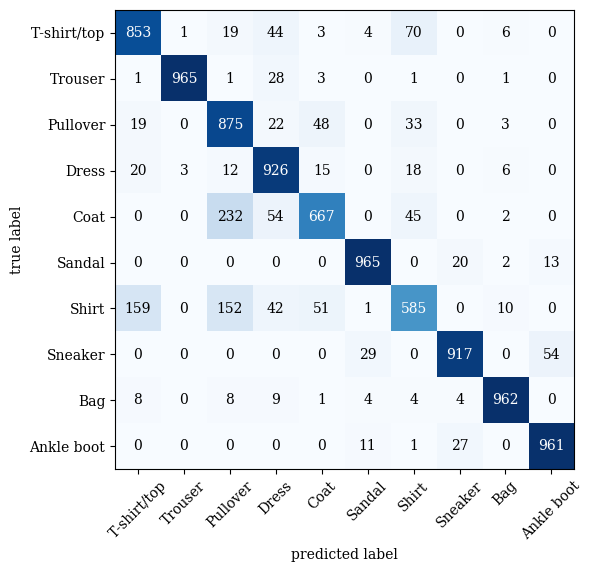

In [20]:
plt.rc('font',family='Serif')

mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6, 6), class_names = class_names, show_normed=False)
plt.tight_layout()
fig.savefig('cm.png')